In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv("cars93.csv")

for c in ["Min.Price", "Max.Price"]:
    data[c] = pd.to_numeric(data[c])

s = data["Type"]

counts = s.value_counts()
types = counts.index.to_list()

print("counts of types:")
for typ, cnt in counts.items():
    print(typ, cnt)

data['Range.Price'] = data['Max.Price'] - data['Min.Price']

counts of types:
Midsize 22
Small 21
Compact 16
Sporty 14
Large 11
Van 9


In [29]:
def IQR(s: pd.Series):
    return s.quantile(0.75) - s.quantile(0.25)


def print_stats(stats_name, price_range):
    print(stats_name)
    print(f"mean : {price_range.mean()}")
    print(f"variance : {price_range.var()}")
    print(f"median : {price_range.median()}")
    print(f"IQR : {IQR(price_range)}")


In [30]:
all_prices = data['Range.Price']
print_stats("\nAll stats:", all_prices)

for typ in types:
    price_range_type = data.loc[data['Type'].eq(typ), 'Range.Price']
    print_stats(f"\nstats for {typ}", price_range_type)


All stats:
mean : 4.773118279569893
variance : 23.209595605423093
median : 3.5
IQR : 4.400000000000002

stats for Midsize
mean : 6.2
variance : 59.64761904761907
median : 4.599999999999999
IQR : 5.475000000000002

stats for Small
mean : 3.4761904761904763
variance : 5.045904761904762
median : 2.7
IQR : 3.499999999999999

stats for Compact
mean : 5.03125
variance : 16.568958333333335
median : 4.599999999999998
IQR : 3.999999999999998

stats for Sporty
mean : 5.1
variance : 17.14923076923077
median : 4.55
IQR : 5.349999999999998

stats for Large
mean : 2.7363636363636354
variance : 7.318545454545455
median : 2.299999999999997
IQR : 1.7499999999999982

stats for Van
mean : 5.833333333333333
variance : 12.334999999999999
median : 5.099999999999998
IQR : 3.8000000000000007


In [31]:
def ecdf(arr: np.ndarray):
    x = np.sort(arr)
    y = np.arange(1, x.size + 1) / x.size
    return x, y


def print_hist(given_data, title, xlabel, ylabel):
    plt.figure()
    plt.hist(given_data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

**Эмпирическая функция распределения**

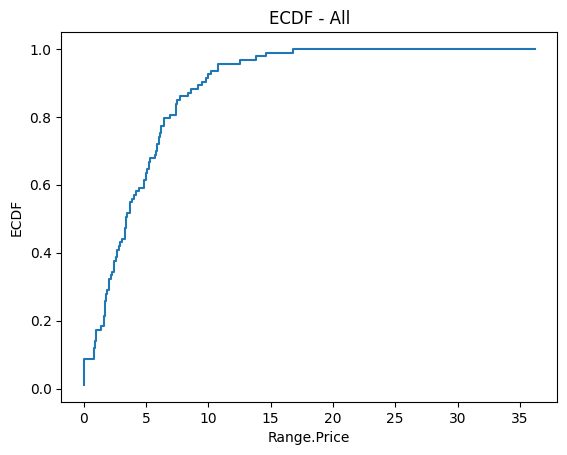

In [32]:
x, y = ecdf(all_prices)
plt.step(x, y)
plt.title('ECDF - All')
plt.xlabel('Range.Price')
plt.ylabel('ECDF')
plt.show()

**Гистограмма - all**

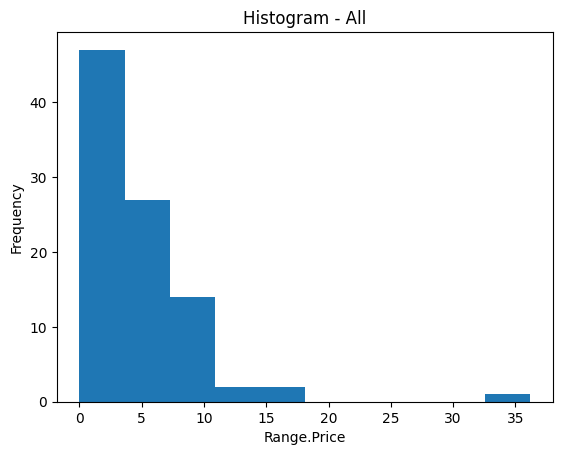

In [33]:
print_hist(all_prices, 'Histogram - All', 'Range.Price', 'Frequency')

**Box-Plot - all**

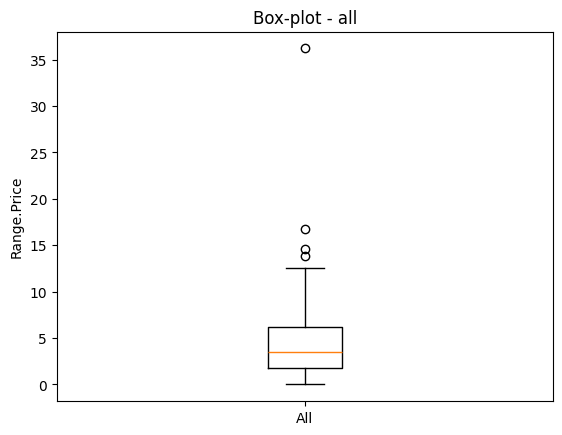

In [34]:
plt.figure()
plt.boxplot([all_prices])
plt.xticks([1], ['All'])
plt.ylabel('Range.Price')
plt.title('Box-plot - all')
plt.show()

**Violinplot - all**

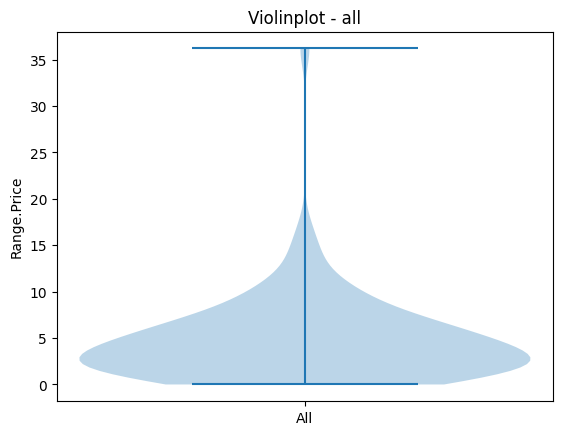

In [35]:
plt.figure()
plt.violinplot([all_prices])
plt.xticks([1], ['All'])
plt.ylabel('Range.Price')
plt.title('Violinplot - all')
plt.show()

**Эмпирическая функция распределения - types**

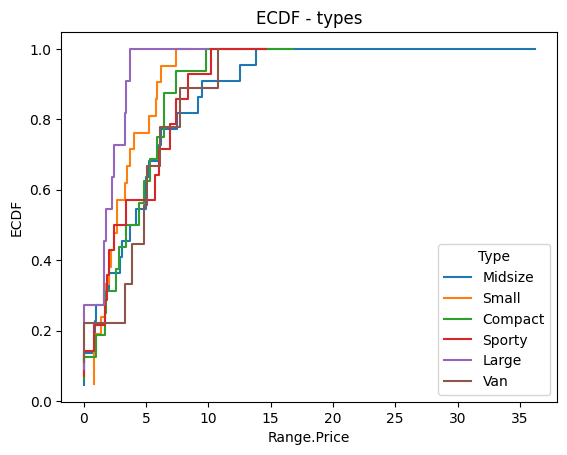

In [36]:
plt.figure()
for typ in types:
    arr = data.loc[data['Type'].eq(typ), 'Range.Price']
    x, y = ecdf(arr)
    plt.step(x, y, label=typ)
plt.legend(title='Type')
plt.xlabel('Range.Price')
plt.ylabel('ECDF')
plt.title('ECDF - types')
plt.show()

**Гистаграмма - types**

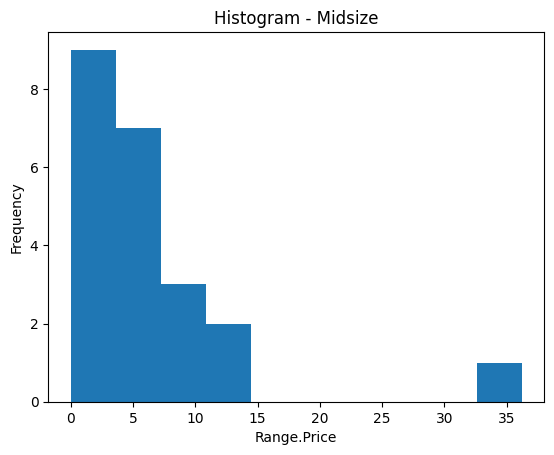

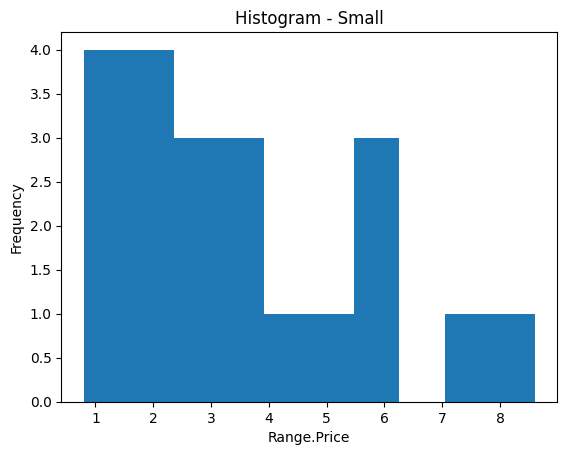

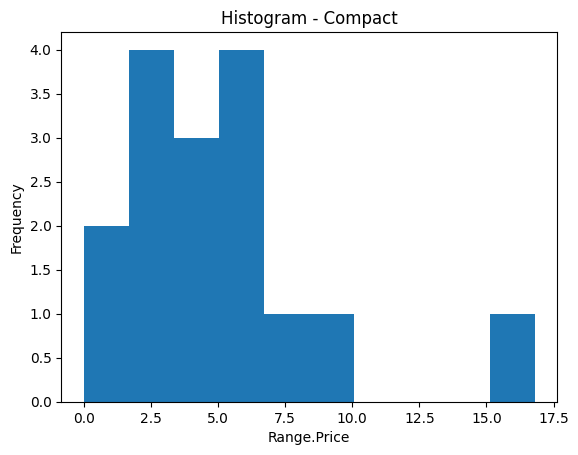

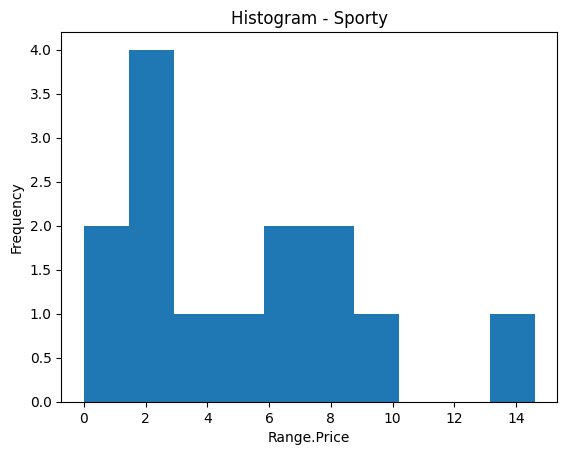

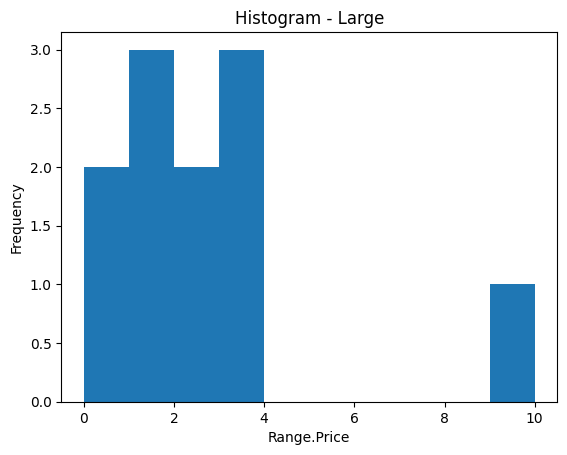

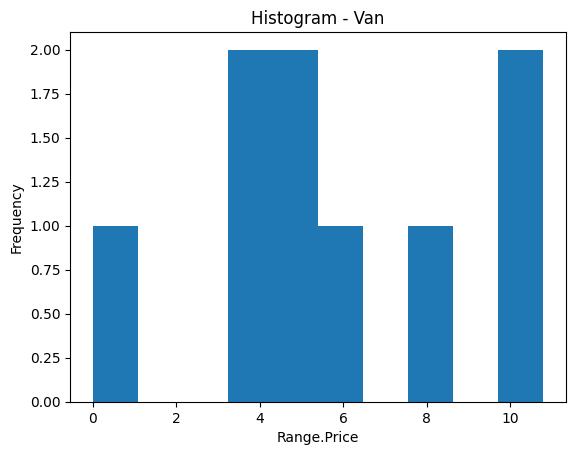

In [37]:
for typ in types:
    arr = data.loc[data['Type'].eq(typ), 'Range.Price']
    print_hist(arr, f'Histogram - {typ}', 'Range.Price', 'Frequency')

**Box-plot - types**

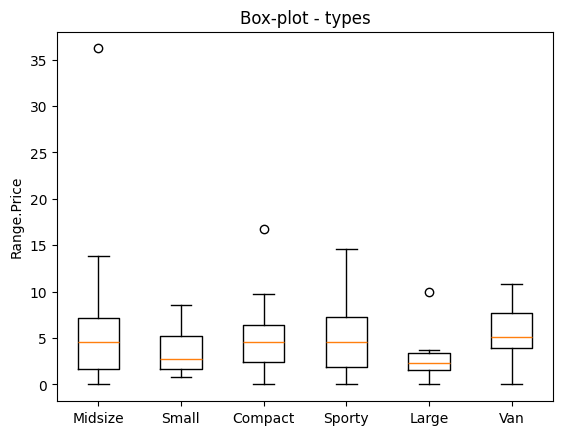

In [38]:
plt.figure()
datas = []
for typ in types:
    datas.append(data.loc[data['Type'].eq(typ), 'Range.Price'])

plt.boxplot(datas)
plt.xticks([i + 1 for i in range(len(types))], types)
plt.ylabel('Range.Price')
plt.title('Box-plot - types')
plt.show()

**Violinplot - types**

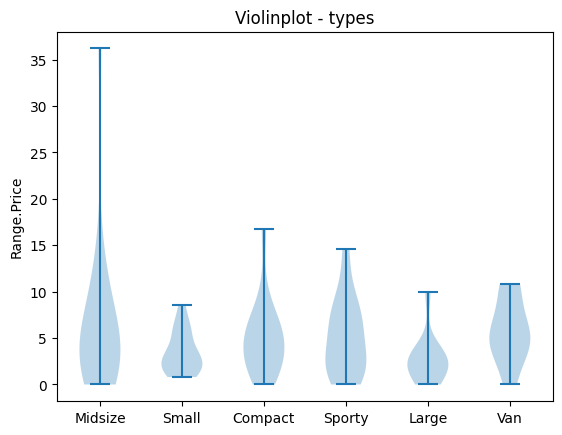

In [39]:
plt.figure()
datas = []
for type_id in range(len(types)):
    datas.append(data.loc[data['Type'].eq(types[type_id]), 'Range.Price'])

plt.violinplot(datas)
plt.xticks([i + 1 for i in range(len(types))], types)
plt.ylabel('Range.Price')
plt.title('Violinplot - types')
plt.show()